PCOS DETECTION USING ULTRASOUND IMAGES FOR CNN BASED IMAGE ANALYSIS

In [2]:
!pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/377.0 MB 6.1 MB/s eta 0:01:02
   ---------------------------------------- 0.6/377.0 MB 6.7 MB/s eta 0:00:57
   ---------------------------------------- 0.9/377.0 MB 6.1 MB/s eta 0:01:02
   ---------------------------------------- 1.2/377.0 MB 6.2 MB/s eta 0:01:01
   ---------------------------------------- 1.5/377.0 MB 6.3 MB/s eta 0:01:00
   ---------------------------------------- 1.8/377.0 MB 6.2 MB/s eta 0:01:01
   ---------------------------------------- 2.1/377.0 MB 6.4 MB/s eta 0:00:59
   ---------------------------------------- 2.4/377.0 MB 6.3 MB/s eta 0:01:00
   ---------------------------------------- 2.7/377.0 MB 6.6 MB/s eta 0:00:57
   ---------------------------------------- 3.0/377.0 MB 6.4 MB/s eta 0:00:

In [5]:
import tensorflow as tf

In [6]:
directory= "C:/Users/SRUTHI/Downloads/archive/data/train"

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import numpy as np
import os
import pandas as pd

In [11]:
pip install opencv-python


   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.3/38.6 MB 2.7 MB/s eta 0:00:15
    --------------------------------------- 0.6/38.6 MB 4.1 MB/s eta 0:00:10
   - -------------------------------------- 1.0/38.6 MB 5.1 MB/s eta 0:00:08
   - -------------------------------------- 1.4/38.6 MB 5.9 MB/s eta 0:00:07
   - -------------------------------------- 1.7/38.6 MB 6.1 MB/s eta 0:00:07
   -- ------------------------------------- 2.2/38.6 MB 6.6 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/38.6 MB 6.8 MB/s eta 0:00:06
   --- ------------------------------------ 2.9/38.6 MB 6.9 MB/s eta 0:00:06
   --- ------------------------------------ 3.4/38.6 MB 7.1 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/38.6 MB 7.2 MB/s eta 0:00:05
   ---- ----

In [13]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 1924 files belonging to 2 classes.


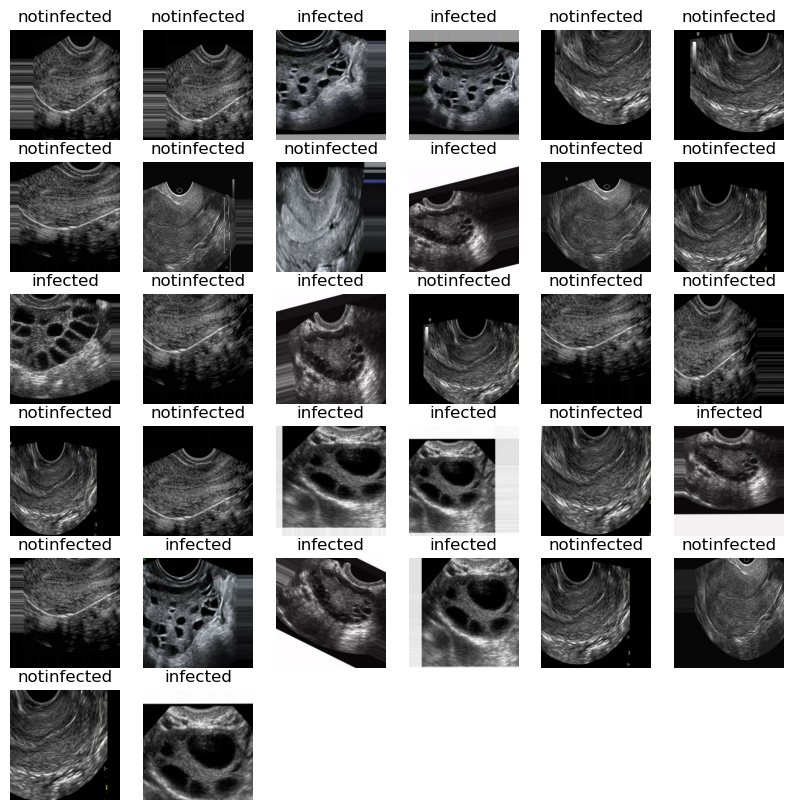

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

RGB TO Gray

In [15]:
gray_directory_train= "C:/Users/SRUTHI/Downloads/archive/data/train"

In [16]:
import cv2
import os
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
#/content/blnw-images-224/bolt/00_09_0101_0100_0400_10.png
def load_images_from_folder(folder,direc,ext=["jpg","png","jpeg"]):
    # images = []
    for filename in os.listdir(folder):
      file_ext = filename.split(".")
      if len(file_ext) ==2 and file_ext[1] in ext:
        grey_img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        # save image
        status = cv2.imwrite(direc+filename,grey_img)
    return 

In [17]:
load_images_from_folder(directory+'/infected',gray_directory_train+'/infected/')

In [18]:
load_images_from_folder(directory+'/notinfected',gray_directory_train+'/notinfected/')

Augumentation


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=30,
                             validation_split=0.3,
                             fill_mode='nearest'
                             )
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory( gray_directory_train, 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='training',
                                       seed=24)
# prepare an iterators for each dataset
val_it = datagen.flow_from_directory( gray_directory_train, 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='validation',
                                       seed=24)

Found 1348 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [22]:
from scipy import ndimage


In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

In [23]:
batchX, batchy = next(train_it)
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchy.shape, batchy.min(), batchy.max()))
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(100, 2), min=0.000, max=1.000
Batch shape=(100, 224, 224, 3), min=0.000, max=1.000


In [24]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

# Model 1

In [25]:
model1 = Sequential()
model1.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model1.add(MaxPooling2D(pool_size=(4,4)))
# REPEAT CONV AND POOLING layer 3 TIMES
model1.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model1.add(MaxPooling2D(pool_size=(4,4)))
#model1.add(Conv2D(128, (5,5),padding='valid',activation='relu'))
# model1.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
# model1.add(MaxPooling2D(pool_size=(4,4)))
model1.add(Flatten())
#model1.add(Dense(128,activation='relu'))
#model1.add(Dense(64,activation='relu'))
model1.add(Dense(2,activation='softmax'))

C:\Users\SRUTHI\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [26]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 10)        │             760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 55, 55, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 51, 51, 12)          │           3,012 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1728)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           3,458 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,230 (28.24 KB)

 Trainable params: 7,230 (28.24 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.losses import CategoricalCrossentropy
model1.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [28]:
history = model1.fit( 
  train_it,
  validation_data=val_it,
  epochs=5)

Epoch 1/5


C:\Users\SRUTHI\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.5426 - loss: 0.6858 - val_accuracy: 0.8125 - val_loss: 0.5412
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.8197 - loss: 0.4799 - val_accuracy: 0.8559 - val_loss: 0.3506
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.8612 - loss: 0.3205 - val_accuracy: 0.8559 - val_loss: 0.3441
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.8939 - loss: 0.2563 - val_accuracy: 0.9149 - val_loss: 0.2018
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.9110 - loss: 0.2088 - val_accuracy: 0.9531 - val_loss: 0.1561


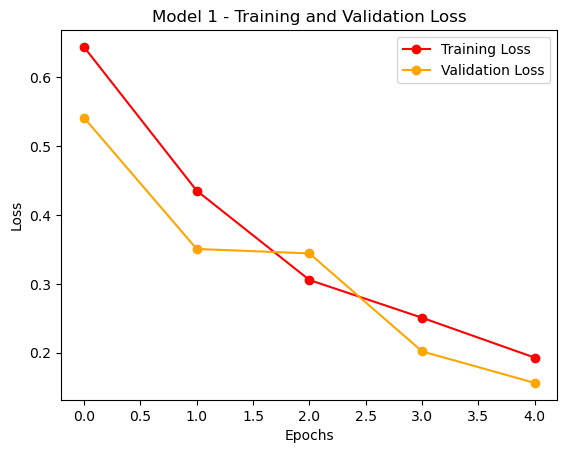

In [30]:
import matplotlib.pyplot as plt

# Plotting the training loss in red color with highlighted points
plt.plot(history.history['loss'], 'r-o', label='Training Loss')
# Plotting the validation loss in orange color with highlighted points
plt.plot(history.history['val_loss'], 'orange', marker='o', linestyle='-', label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 1 - Training and Validation Loss')
plt.legend()
plt.show()

# Model 2 

final model

In [31]:
model2 = Sequential()
model2.add(Conv2D(12, (6,6),padding='valid',activation='relu',input_shape=(224,224,3)))
model2.add(MaxPooling2D(pool_size=(6,6)))
model2.add(Conv2D(15, (5,5),padding='valid',activation='relu'))
model2.add(MaxPooling2D(pool_size=(5,5)))
model2.add(Conv2D(10, (3,3),padding='valid',activation='relu'))
# model2.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Flatten())
#model2.add(Dense(128,activation='relu'))
#model2.add(Dense(64,activation='relu'))
model2.add(Dense(2,activation='softmax'))

In [32]:
from tensorflow.keras.losses import CategoricalCrossentropy
model2.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [33]:
history2 = model2.fit( 
  train_it,
  validation_data=val_it,
  epochs=8)

Epoch 1/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.6016 - loss: 0.6737 - val_accuracy: 0.6337 - val_loss: 0.6379
Epoch 2/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.6177 - loss: 0.6264 - val_accuracy: 0.7188 - val_loss: 0.5583
Epoch 3/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.7706 - loss: 0.5233 - val_accuracy: 0.9340 - val_loss: 0.3730
Epoch 4/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.9422 - loss: 0.3302 - val_accuracy: 0.9722 - val_loss: 0.1844
Epoch 5/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.9809 - loss: 0.1471 - val_accuracy: 0.9792 - val_loss: 0.1090
Epoch 6/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.9814 - loss: 0.0834 - val_accuracy: 0.9931 - val_loss: 0.0526
Epoch 7/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.9929 - loss: 0.0478 - val_accuracy: 0.9948 - val_loss: 0.0368
Epoch 8/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.9856 - loss: 0.0527 - val_accuracy: 0.9948 - val_loss: 0.0319


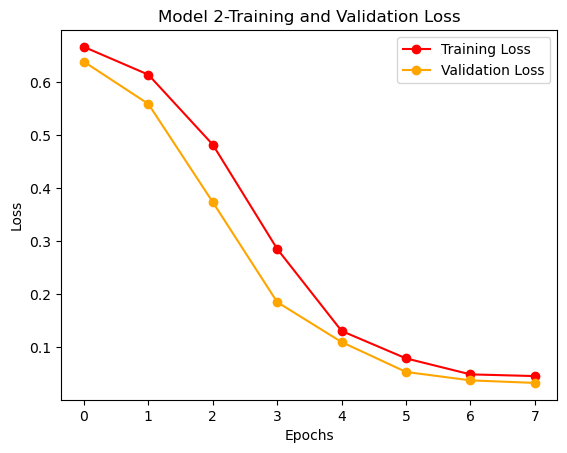

In [34]:
import matplotlib.pyplot as plt

# Plotting the training loss in red color with highlighted points
plt.plot(history2.history['loss'], 'r-o', label='Training Loss')
# Plotting the validation loss in orange color with highlighted points
plt.plot(history2.history['val_loss'], 'orange', marker='o', linestyle='-', label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 2-Training and Validation Loss')
plt.legend()
plt.show()

In [35]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 219, 219, 12)        │           1,308 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 36, 36, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 15)          │           4,515 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 10)            │           1,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,617 (84.45 KB)

 Trainable params: 7,205 (28.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,412 (56.30 KB)

#Model 3


In [36]:
model3 = Sequential()
model3.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model3.add(MaxPooling2D(pool_size=(4,4)))
model3.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model3.add(MaxPooling2D(pool_size=(4,4)))
model3.add(Conv2D(5, (3,3),padding='valid',activation='relu'))
# model3.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model3.add(MaxPooling2D(pool_size=(3,3)))
model3.add(Flatten())
#model3.add(Dense(128,activation='relu'))
#model3.add(Dense(64,activation='relu'))
model3.add(Dense(2,activation='softmax'))

In [37]:
from tensorflow.keras.losses import CategoricalCrossentropy
model3.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [38]:
history3 = model3.fit( 
  train_it,
  validation_data=val_it,
  epochs=6)

Epoch 1/6
14/14 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.5159 - loss: 0.7254 - val_accuracy: 0.6042 - val_loss: 0.6604
Epoch 2/6
14/14 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.6704 - loss: 0.6437 - val_accuracy: 0.8177 - val_loss: 0.5936
Epoch 3/6
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.8420 - loss: 0.5574 - val_accuracy: 0.9288 - val_loss: 0.4274
Epoch 4/6
14/14 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9298 - loss: 0.3859 - val_accuracy: 0.9653 - val_loss: 0.2115
Epoch 5/6
14/14 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.9691 - loss: 0.1759 - val_accuracy: 0.9635 - val_loss: 0.1077
Epoch 6/6
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.9793 - loss: 0.0914 - val_accuracy: 0.9705 - val_loss: 0.0865


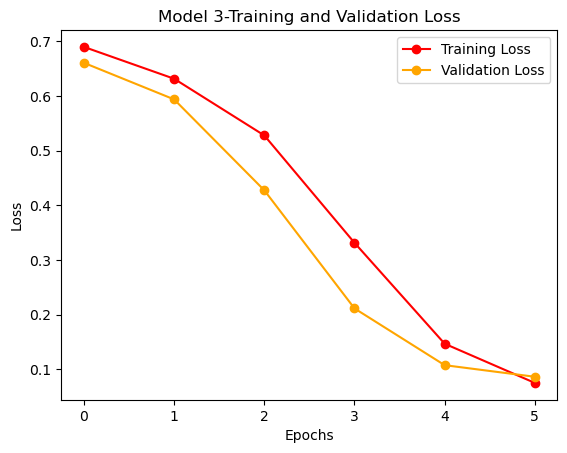

In [39]:
import matplotlib.pyplot as plt

# Plotting the training loss in red color with highlighted points
plt.plot(history3.history['loss'], 'r-o', label='Training Loss')
# Plotting the validation loss in orange color with highlighted points
plt.plot(history3.history['val_loss'], 'orange', marker='o', linestyle='-', label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 3-Training and Validation Loss')
plt.legend()
plt.show()

In [40]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 55, 55, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 51, 51, 12)          │           3,012 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 10, 10, 5)           │             545 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 3, 3, 5)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 45)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              92 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,229 (51.68 KB)

 Trainable params: 4,409 (17.22 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,820 (34.46 KB)

# Model 4

In [41]:
model4 = Sequential()
model4.add(Conv2D(12, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model4.add(MaxPooling2D(pool_size=(4,4)))
model4.add(Conv2D(10, (5,5),padding='valid',activation='relu'))
model4.add(MaxPooling2D(pool_size=(4,4)))
model4.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model4.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model4.add(MaxPooling2D(pool_size=(3,3)))
model4.add(Flatten())
#model4.add(Dense(128,activation='relu'))
#model4.add(Dense(64,activation='relu'))
model4.add(Dense(2,activation='softmax'))

In [42]:
from tensorflow.keras.losses import CategoricalCrossentropy
model4.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [44]:
history4 = model4.fit( 
  train_it,
  validation_data=val_it,
  epochs=10)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9690 - loss: 0.1012 - val_accuracy: 0.9844 - val_loss: 0.0894
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.9820 - loss: 0.0718 - val_accuracy: 0.9844 - val_loss: 0.0622
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.9917 - loss: 0.0481 - val_accuracy: 0.9826 - val_loss: 0.0556
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.9852 - loss: 0.0445 - val_accuracy: 0.9896 - val_loss: 0.0387
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.9918 - loss: 0.0289 - val_accuracy: 0.9896 - val_loss: 0.0372
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9918 - loss: 0.0375 - val_accuracy: 0.9913 - val_loss: 0.0334
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.9885 - loss: 0.0298 - val_accuracy: 0.9948 - val_loss: 0.0256
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9943 - loss: 0.0206 - val_accuracy: 0.9931 - val_loss:

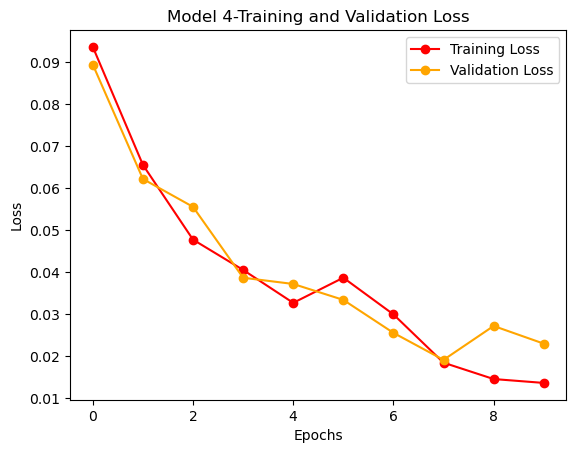

In [45]:
import matplotlib.pyplot as plt

# Plotting the training loss in red color with highlighted points
plt.plot(history4.history['loss'], 'r-o', label='Training Loss')
# Plotting the validation loss in orange color with highlighted points
plt.plot(history4.history['val_loss'], 'orange', marker='o', linestyle='-', label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 4-Training and Validation Loss')
plt.legend()
plt.show()

In [46]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 220, 220, 12)        │             912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 55, 55, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 51, 51, 10)          │           3,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 12, 12, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 8)           │             728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 3, 3, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 72)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             146 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,390 (56.21 KB)

 Trainable params: 4,796 (18.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,594 (37.48 KB)

# Model 5

In [ ]:
model5 = Sequential()
model5.add(Conv2D(15, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model5.add(MaxPooling2D(pool_size=(5,5)))
model5.add(Conv2D(12, (4,4),padding='valid',activation='relu'))
model5.add(MaxPooling2D(pool_size=(4,4)))
model5.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model5.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model5.add(MaxPooling2D(pool_size=(3,3)))
model5.add(Flatten())
#model5.add(Dense(128,activation='relu'))
#model5.add(Dense(64,activation='relu'))
model5.add(Dense(2,activation='softmax'))

In [48]:
from tensorflow.keras.losses import CategoricalCrossentropy
model5.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [49]:
history5 = model5.fit( 
  train_it,
  validation_data=val_it,
  epochs=7)

Epoch 1/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.5841 - loss: 0.6932 - val_accuracy: 0.5938 - val_loss: 0.6577
Epoch 2/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.6417 - loss: 0.6392 - val_accuracy: 0.6892 - val_loss: 0.5777
Epoch 3/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.7918 - loss: 0.5365 - val_accuracy: 0.9062 - val_loss: 0.3836
Epoch 4/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.9432 - loss: 0.3295 - val_accuracy: 0.9757 - val_loss: 0.1948
Epoch 5/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.9652 - loss: 0.1673 - val_accuracy: 0.9722 - val_loss: 0.1238
Epoch 6/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9739 - loss: 0.1106 - val_accuracy: 0.9809 - val_loss: 0.0636
Epoch 7/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.9871 - loss: 0.0611 - val_accuracy: 0.9896 - val_loss: 0.0565


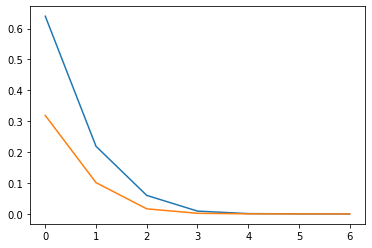

In [37]:
import matplotlib.pyplot as plt

# Plotting the training loss in red color with highlighted points
plt.plot(history5.history['loss'], 'r-o', label='Training Loss')
# Plotting the validation loss in orange color with highlighted points
plt.plot(history5.history['val_loss'], 'orange', marker='o', linestyle='-', label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 5-Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
model5.summary()

# saving model


In [39]:
model2.save('pcos_model.h5')

In [40]:
from tensorflow import keras
model = keras.models.load_model('pcos_model.h5')
#model.predict(X_test)

In [46]:

from keras.preprocessing.image import load_img
image = load_img("C:/Users/SRUTHI/Downloads/archive (1)/data/test/infected/img_0_993.jpg", target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
prediction = model.predict(img)

1/1 [==============================] - 0s 71ms/step


In [48]:
print(prediction)

[[1.0000000e+00 3.8640052e-10]]


In [49]:
l={"infected":prediction[0][0],"notinfected":prediction[0][1]}
def get_key(val):
    for key, value in l.items():
         if val == value:
             return key
 
    return "key doesn't exist"
#label[0][1]

In [50]:
j=prediction.max()
get_key(j)

'infected'